In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import acquire

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

In [3]:
df = pd.read_csv('cached_all_dfs.csv')

In [4]:
df.head()

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
# first I need to set my date column to datetimeindex
df.sale_date = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date').sort_index()
df

,Unnamed: 0,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,level_0,index,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,0.0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,211816,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,832656,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,NaN,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,213642,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,215468,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,11,11.0,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,619013,34,21.0,619014,9,735 SW Military Dr,San Antonio,9,TX,78221,33,13.0,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,620839,34,32.0,620840,10,8503 NW Military Hwy,San Antonio,10,TX,78231,33,13.0,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694
2017-12-31 00:00:00+00:00,622665,35,55.0,622666,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,34,14.0,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066


# Train, Test, Split

In [6]:
# this is an example of a percentage based time-series split
# train_size = .70
# n = df.shape[0]
# test_start_index = round(train_size * n)

# train = df[:test_start_index] # everything up (not including) to the test_start_index
# test = df[test_start_index:] # everything from the test_start_index to the end

# plt.plot(train.index, train.sale_amount)
# plt.plot(test.index, test.sale_amount)

In [7]:
# wanting to see what this is returning
df.shape[0]

913000

In [8]:
# here I want to resample for better visualizations in the future
df.resample('W').mean()

,Unnamed: 0,item,sale_amount,sale_id,store,store_id,store_zipcode,level_0,index,item_id,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,455589.5,25.5,30.355667,455590.5,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2013-01-13 00:00:00+00:00,455596.0,25.5,29.686286,455597.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2013-01-20 00:00:00+00:00,455603.0,25.5,29.414286,455604.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2013-01-27 00:00:00+00:00,455610.0,25.5,29.513714,455611.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2013-02-03 00:00:00+00:00,455617.0,25.5,31.150571,455618.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-03 00:00:00+00:00,457381.0,25.5,53.510286,457382.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2017-12-10 00:00:00+00:00,457388.0,25.5,44.114286,457389.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11
2017-12-17 00:00:00+00:00,457395.0,25.5,44.370286,457396.0,5.5,5.5,78224.8,16.5,9.5,25.5,5.1604,2.384688e+11,2.384688e+11


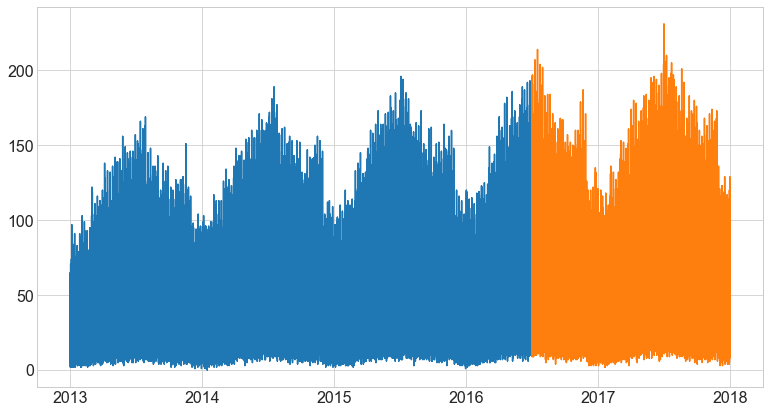

In [9]:
# let's try a percentage based time-series split with store data
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]# everything up (not including) to the test_start_index
test = df[test_start_index:]# everything from the test_start_index to the end


plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

# Data visualization time

Line plot with time on the x-axis

In [10]:
# need to take this down to the index and sale amount only 
s = train.sale_amount.copy()

In [11]:
s.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

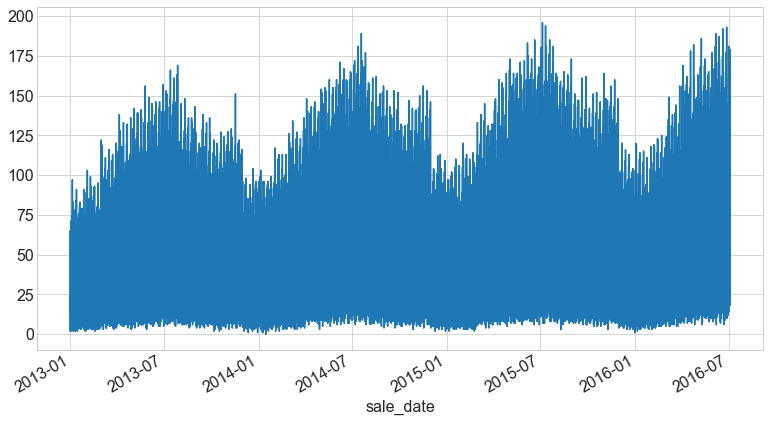

In [12]:
s.plot()

In [ ]:
# dont like how the above looks so lets set it to weeks and see how that looks
#s.resample('W').mean().plot() -- can't do this here because I didn't set this to 
#timedatenindex I will go back and fix that now

<AxesSubplot:xlabel='sale_date'>

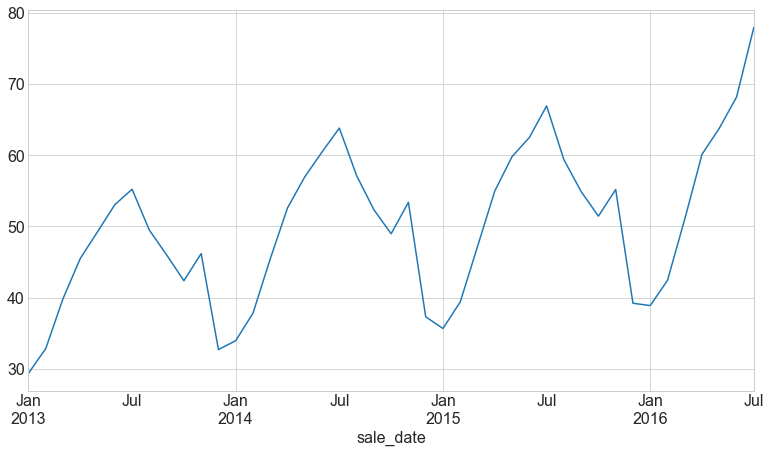

In [13]:
# now let's look at this by month
s.resample('M').mean().plot()

We can combine multiple resampling periods on a single viz:

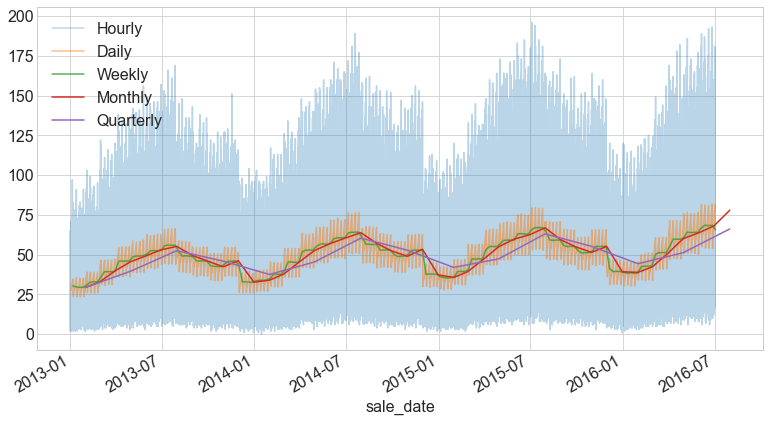

In [16]:
ax = s.plot(alpha=.3, label='Hourly')
s.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
s.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
s.resample('M').mean().plot(ax=ax, label='Monthly')
s.resample('3M').mean().plot(ax=ax, label= "Quarterly")
ax.legend()

Treat date components as categorical variables
Aside: Month and Weekday Ordering

In [17]:
s.index.strftime('%m-%b')

Index(['01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan', '01-Jan',
       '01-Jan', '01-Jan', '01-Jan',
       ...
       '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul', '07-Jul',
       '07-Jul', '07-Jul', '07-Jul'],
      dtype='object', name='sale_date', length=639100)

In [18]:
s.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:xlabel='sale_date'>

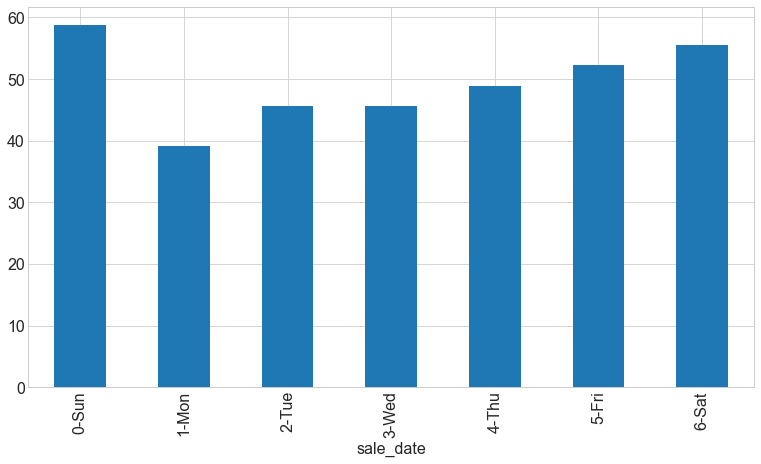

In [19]:
# showing how it is in order when the days are numbered
s.groupby(s.index.strftime('%w-%a')).mean().plot.bar()

Looks like there is a difference in sales by day

<AxesSubplot:xlabel='sale_date'>

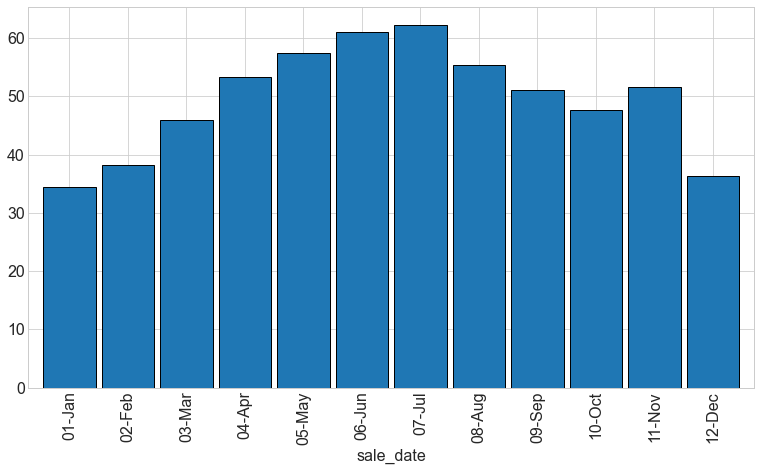

In [20]:
# showing how it's in order when you use the month number
s.groupby(s.index.strftime('%m-%b')).mean().plot.bar(width=.9, ec='black')

In [21]:
# now let's move on the the rolling average
daily = s.resample('D').mean()
daily.rolling(30).mean().head(31)

sale_date
2013-01-01 00:00:00+00:00          NaN
2013-01-02 00:00:00+00:00          NaN
2013-01-03 00:00:00+00:00          NaN
2013-01-04 00:00:00+00:00          NaN
2013-01-05 00:00:00+00:00          NaN
2013-01-06 00:00:00+00:00          NaN
2013-01-07 00:00:00+00:00          NaN
2013-01-08 00:00:00+00:00          NaN
2013-01-09 00:00:00+00:00          NaN
2013-01-10 00:00:00+00:00          NaN
2013-01-11 00:00:00+00:00          NaN
2013-01-12 00:00:00+00:00          NaN
2013-01-13 00:00:00+00:00          NaN
2013-01-14 00:00:00+00:00          NaN
2013-01-15 00:00:00+00:00          NaN
2013-01-16 00:00:00+00:00          NaN
2013-01-17 00:00:00+00:00          NaN
2013-01-18 00:00:00+00:00          NaN
2013-01-19 00:00:00+00:00          NaN
2013-01-20 00:00:00+00:00          NaN
2013-01-21 00:00:00+00:00          NaN
2013-01-22 00:00:00+00:00          NaN
2013-01-23 00:00:00+00:00          NaN
2013-01-24 00:00:00+00:00          NaN
2013-01-25 00:00:00+00:00          NaN
2013-01-26 00:0

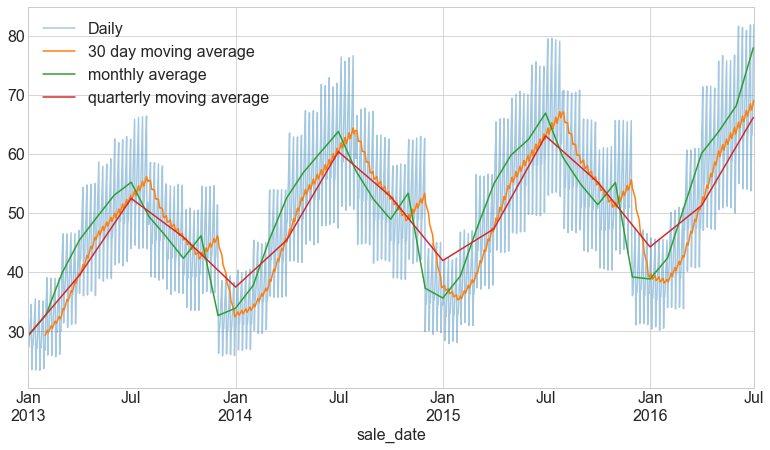

In [26]:
# let's plot the rolling average
ax = s.resample('D').mean().plot(label='Daily', alpha=.4)
s.resample('D').mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
s.resample('M').mean().plot(ax=ax, label='monthly average')
s.resample('3M').mean().rolling(1).mean().plot(ax=ax, label = 'quarterly moving average')
#s.sample('Y').mean().plot(ax=ax, label = 'Yearly')
ax.legend()